In [2]:
data = []
with open(r"D:\资料\短文本聚类研究\backup\train\medQA.train.txt", "r", encoding='utf-8') as f:

    line = f.readline()
    # line.split()
    while line:
        data.append(line.split()[0])
        line = f.readline()

data = list(set(data))
data

['传染科',
 '康复医学科',
 '其他科室',
 '儿科',
 '外科',
 '皮肤性病科',
 '内科',
 '美容',
 '体检科',
 '子女教育',
 '整形美容科',
 '营养保健科',
 '运动瘦身',
 '妇产科',
 '家居环境',
 '心理健康科',
 '五官科',
 '肿瘤科',
 '药品',
 '辅助检查科',
 '遗传',
 '保健养生',
 '中医科']

In [21]:
import re
data = []
with open(r"D:\资料\短文本聚类研究\backup\train\medQA.train.txt", "r", encoding='utf-8') as f:

    line = f.readline()
    # line.split()
    while line:
        data.append(line.split()[3])
        line = f.readline()
data = list(set(data))
data1 = []
for _ in data:
    data1.append(re.sub("[A-Za-z0-9\!\%\[\]\,\。]", "", _))

In [22]:
import jieba

newdata = []

for x in data1:
    #newdata.append(jieba.lcut(x))
    newdata.append(list(set(jieba.lcut(x))))


def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(
        filepath, 'r', encoding='utf-8').readlines()]
    return stopwords


def move_stopwords(sentence_list, stopwords_list):
    dd = []
    for word in sentence_list:
        out_list = []
        for tmp in word:
            if tmp not in stopwords_list:
                out_list.append(tmp)
        dd.append(out_list)
    return dd


stopwords = stopwordslist(
    r"D:\资料\短文本聚类研究\backup\stopwords-master\stopwords-master\baidu_stopwords.txt")
#num = ['1','2','3','4','5','6','7','8','9','0','a','b','c','d','']
tmp = move_stopwords(newdata, stopwords)
remove_chars = '[·’!"\#$%&\'()＃！（）*+,-./:;；，。：<=>?\@，：?￥★、…．。＞【】［］《》？“”‘’\[\\]^_`{|}~]+1234567890'

tmp = move_stopwords(tmp, remove_chars)

findata = tmp

In [3]:
with open(r"D:\迅雷下载\BTM-master\BTM\sample-data\tt.txt","w") as f:
    for x in findata:
        if len(x) >= 5:
            for y in x:
                f.write(y+' ')
            f.write("\n")

In [23]:
import gensim
from pprint import pprint
import gensim.corpora as corpora
from gensim.models import CoherenceModel
# higher threshold fewer phrases.
bigram = gensim.models.Phrases(findata, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[findata], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [24]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]


data_words_bigrams = make_bigrams(findata)
data_words_bigrams

[['感觉',
  '感冒',
  '咳嗽',
  '颗粒',
  '流鼻涕',
  '两片',
  '喂奶',
  '片',
  '想着',
  '吃药',
  '第三天',
  '医生',
  '送回',
  '前两天',
  '第二天',
  '奶粉',
  '第一天',
  '发炎',
  '不住',
  '没痰',
  '黄痰',
  '发烧',
  '不',
  '开',
  '阿奇',
  '一点',
  '吃',
  '照顾',
  '干痒',
  '阿莫西林',
  '期间',
  '偶尔',
  '霉素',
  '晚上',
  '这是',
  '第五天',
  '宝宝',
  '四天',
  '医院',
  '喝',
  '去',
  '好转',
  '奶奶家',
  '连花清',
  '瘟',
  '嗓子',
  '没',
  '哺乳期'],
 ['感冒',
  '咳嗽',
  '扁桃体',
  '艾滋病',
  '学生',
  '发炎',
  '我会',
  '嗓子疼',
  '还',
  '做爱',
  '经历',
  '吃',
  '好像',
  '几天',
  '点药',
  '嗓子',
  '不疼'],
 ['韧带', '治疗', '电动车', '躺', '预防', '猫腰', '疼', '不', '工骑', '平时', '拉伤', '往前', '请问'],
 ['针',
  '痛',
  '肚脐',
  '肠炎',
  '腹痛',
  '检查',
  '效果',
  '多大',
  '东西',
  '裹',
  '吊',
  '抽筋',
  '好像',
  '干呕',
  '医院',
  '拉肚子',
  '去',
  '昨天晚上'],
 ['冬天', '病', '头痛', '不', '会得', '早上', '说', '上年', '老人', '洗头发', '真的'],
 ['磷酸酶',
  '抗体',
  '检查',
  '生化',
  '肝功',
  '回答',
  '.--.',
  '抗原',
  '还好',
  '阳性',
  '球蛋白',
  '核心',
  '医师',
  '检测',
  '乙肝',
  '口干舌燥',
  '小三阳',
  '.----..',
  '哪种',
  '未曾',
  '总',
  '碱性'

In [25]:
id2word = corpora.Dictionary(data_words_bigrams)     # Create Dictionary
texts = data_words_bigrams                           # Create Corpus
corpus = [id2word.doc2bow(text) for text in texts]   # Term Document Frequency
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1)]]


In [8]:
p_score = []
score = []
for _ in range(6, 17, 2):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=_,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)
    p_score.append(lda_model.log_perplexity(corpus))
    coherence_model_lda = CoherenceModel(
        model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
    score.append(coherence_model_lda.get_coherence())

KeyboardInterrupt: 

In [44]:
print(p_score)
print(score)

[-8.59195820089982, -8.830003431276955, -9.346336157935937, -10.734928105941345, -13.455965391545332, -16.149448489287842]
[0.410720266949616, 0.3665378321823131, 0.40167973495595294, 0.36501468556530353, 0.3453277487946341, 0.32897673127232313]


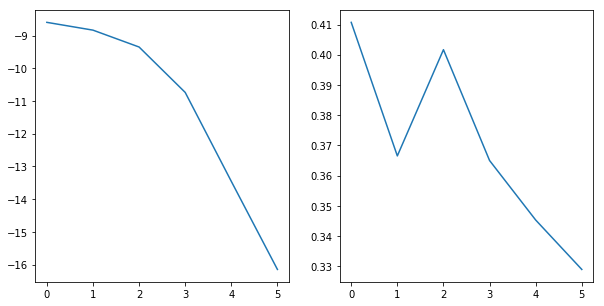

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(p_score)
plt.subplot(122)
plt.plot(score)

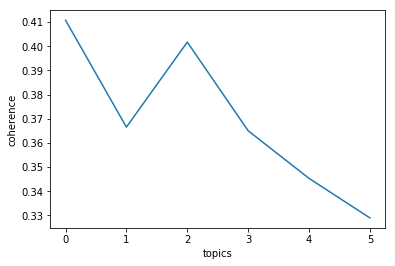

In [74]:
plt.plot(score)
plt.ylabel("coherence")
plt.xlabel("topics")
plt.savefig('./coherence.svg', format='svg')

In [60]:
# 6 topics
# a measure of how good the model is. lower the better.
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(
    model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)   # 越高越好


Perplexity:  -8.59195818124302

Coherence Score:  0.410720266949616


In [63]:
# 10 topics
# a measure of how good the model is. lower the better.
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(
    model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)   # 越高越好


Perplexity:  -9.346336157935937

Coherence Score:  0.40167973495595294


In [68]:
# 5 topics
# a measure of how good the model is. lower the better.
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(
    model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)   # 越高越好


Perplexity:  -8.501872474368405

Coherence Score:  0.43588899642573437


In [26]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=5,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [17]:
coherence_model_lda = CoherenceModel(
    model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
coherence_lda

-3.064819379720215

In [8]:
lda_model.show_topics(formatted=False)

[(0,
  [('做', 0.05198504),
   ('手术', 0.029938944),
   ('检查', 0.02130405),
   ('月经', 0.01758773),
   ('月', 0.016322663),
   ('号', 0.011552547),
   ('有时候', 0.011508223),
   ('请', 0.010616378),
   ('皮肤', 0.008761975),
   ('尿', 0.008173132)]),
 (1,
  [('吃', 0.076446325),
   ('孩子', 0.028665002),
   ('怀孕', 0.026264505),
   ('宝宝', 0.026095388),
   ('月', 0.015442961),
   ('还', 0.0153835025),
   ('东西', 0.011878372),
   ('点', 0.010031261),
   ('昨天', 0.009843601),
   ('痒', 0.009459205)]),
 (2,
  [('治疗', 0.037268367),
   ('医生', 0.033003435),
   ('说', 0.029164035),
   ('医院', 0.028458443),
   ('去', 0.02749857),
   ('好', 0.02729406),
   ('请问', 0.025221653),
   ('后', 0.019418884),
   ('检查', 0.019041143),
   ('想', 0.012463239)]),
 (3,
  [('上', 0.023672054),
   ('一个', 0.020124806),
   ('发现', 0.018564455),
   ('大', 0.017362045),
   ('小', 0.0153360395),
   ('会', 0.014876338),
   ('长', 0.014370846),
   ('影响', 0.012199709),
   ('导致', 0.008784846),
   ('两个', 0.008639207)]),
 (4,
  [('不', 0.049107693),
   ('都

In [25]:
lda_model.show_topics(formatted=False)


[(0,
  [('发病', 0.019471066),
   ('时间', 0.017287234),
   ('无', 0.01581499),
   ('诊断', 0.015481956),
   ('化验', 0.009293606),
   ('一年', 0.008948928),
   ('病史', 0.008762551),
   ('慢性', 0.008434632),
   ('治', 0.007965458),
   ('内', 0.0068566464)]),
 (1,
  [('手术', 0.031212345),
   ('疼痛', 0.030271793),
   ('月', 0.023737252),
   ('月经', 0.017038763),
   ('后', 0.016431095),
   ('两个', 0.013087788),
   ('持续', 0.012219604),
   ('补充', 0.010495981),
   ('第一次', 0.010454332),
   ('恢复', 0.008853368)]),
 (2,
  [('治疗', 0.036479656),
   ('医生', 0.033207662),
   ('说', 0.029904239),
   ('医院', 0.028902477),
   ('去', 0.02806089),
   ('检查', 0.02795166),
   ('做', 0.024575453),
   ('好', 0.023443086),
   ('想', 0.021688985),
   ('后', 0.017931858)]),
 (3,
  [('请问', 0.040150646),
   ('吃', 0.035176966),
   ('谢谢', 0.016748799),
   ('药', 0.016260745),
   ('描述', 0.015870612),
   ('月', 0.015650721),
   ('怀孕', 0.013405019),
   ('宝宝', 0.0131250415),
   ('影响', 0.011626209),
   ('天', 0.010969498)]),
 (4,
  [('不', 0.034840483),

In [27]:
topics = []
for topic_id, topic in lda_model.show_topics(formatted=False):
    topic = [word for word, _ in topic]
    topics.append(topic)
topics
cm = CoherenceModel(topics=topics, corpus=corpus,
                    dictionary=id2word, texts=data_words_bigrams, coherence='c_v')
cm.get_coherence()
# 去重后建立的模型

0.5072646420504019

In [20]:
topics = []
for topic_id, topic in lda_model.show_topics(formatted=False):
    topic = [word for word, _ in topic]
    topics.append(topic)
topics
cm = CoherenceModel(topics=topics, corpus=corpus,
                    dictionary=id2word, texts=data_words_bigrams, coherence='c_v')
cm.get_coherence()
# 未去重建立的模型

0.5136377988254117

In [10]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.031*"治疗" + 0.030*"医生" + 0.028*"医院" + 0.026*"请问" + 0.025*"后" + 0.024*"检查" '
  '+ 0.022*"做" + 0.017*"月" + 0.014*"说" + 0.012*"谢谢"'),
 (1,
  '0.033*"不" + 0.027*"都" + 0.025*"会" + 0.020*"很" + 0.019*"还" + 0.016*"吃" + '
  '0.016*"好" + 0.015*"去" + 0.013*"没" + 0.011*"说"'),
 (2,
  '0.025*"患者" + 0.024*"天" + 0.018*"月经" + 0.017*"年龄" + 0.014*"描述" + 0.014*"性别" '
  '+ 0.013*"第一次" + 0.011*"服用" + 0.011*"号" + 0.010*"大夫"'),
 (3,
  '0.023*"时间" + 0.013*"发病" + 0.012*"无" + 0.009*"检查" + 0.008*"高" + 0.008*"持续" + '
  '0.008*"左" + 0.007*"化验" + 0.007*"发烧" + 0.006*"超"'),
 (4,
  '0.036*"感觉" + 0.023*"疼" + 0.019*"时" + 0.017*"疼痛" + 0.014*"症状" + 0.014*"痛" + '
  '0.010*"舒服" + 0.009*"头晕" + 0.008*"昨天" + 0.006*"老是"')]


In [11]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.031*"治疗" + 0.030*"医生" + 0.028*"医院" + 0.026*"请问" + 0.025*"后" + 0.024*"检查" '
  '+ 0.022*"做" + 0.017*"月" + 0.014*"说" + 0.012*"谢谢"'),
 (1,
  '0.033*"不" + 0.027*"都" + 0.025*"会" + 0.020*"很" + 0.019*"还" + 0.016*"吃" + '
  '0.016*"好" + 0.015*"去" + 0.013*"没" + 0.011*"说"'),
 (2,
  '0.025*"患者" + 0.024*"天" + 0.018*"月经" + 0.017*"年龄" + 0.014*"描述" + 0.014*"性别" '
  '+ 0.013*"第一次" + 0.011*"服用" + 0.011*"号" + 0.010*"大夫"'),
 (3,
  '0.023*"时间" + 0.013*"发病" + 0.012*"无" + 0.009*"检查" + 0.008*"高" + 0.008*"持续" + '
  '0.008*"左" + 0.007*"化验" + 0.007*"发烧" + 0.006*"超"'),
 (4,
  '0.036*"感觉" + 0.023*"疼" + 0.019*"时" + 0.017*"疼痛" + 0.014*"症状" + 0.014*"痛" + '
  '0.010*"舒服" + 0.009*"头晕" + 0.008*"昨天" + 0.006*"老是"')]


In [12]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:169: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

In [13]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\Yang\Anaconda3\lib\site-packages\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\Yang\Anaconda3\lib\site-packages\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.294509  0.135133       1        1  35.037777
0     -0.203179 -0.202210       2        1  28.493753
4      0.148097  0.298458       3        1  14.776485
3      0.207535 -0.192716       4        1  13.576421
2      0.142056 -0.038664       5        1   8.115563, topic_info=     Term          Freq         Total Category  logprob  loglift
0       不  12321.000000  12321.000000  Default  30.0000  30.0000
18     治疗   9163.000000   9163.000000  Default  29.0000  29.0000
320    医生   8998.000000   8998.000000  Default  28.0000  28.0000
121    感觉   7081.000000   7081.000000  Default  27.0000  27.0000
7       都   9986.000000   9986.000000  Default  26.0000  26.0000
...   ...           ...           ...      ...      ...      ...
1404   阴道    407.796580    408.601596   Topic5  -5.3427   2.5094
1603   阳性    396.677742    397.491076   Topic5  -5.3704   2.5093
1368   人流    393.200676    394.007788   Topic5  -5.3792   2.5093
1779  长时间    395.401764    396.226129   Topic5  -5.3736   2.5093
213    描述   1225.295309   3587.404534   Topic5  -4.2426   1.4371

[205 rows x 6 columns], token_table=      Topic      Freq Term
term                      
80        2  0.999747   ..
531       1  0.999797   一个
397       2  0.999169   一年
283       1  0.999405   一点
480       1  0.999694    上
...     ...       ...  ...
1603      5  0.998765   阳性
1077      3  0.999483   阴茎
1404      5  0.998528   阴道
500       2  0.999498   饮食
103       4  0.998954    高

[188 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 4, 3])

In [70]:
pyLDAvis.save_html(vis, 'lda_5.html')